In [1]:
import math
import numpy as np
from time import time
import matplotlib.pyplot as plt 

from pynq import Overlay
from pynq import allocate
ol = Overlay("histogram_2.bit")
ol?
ip = ol.histogram_0

INPUT_SIZE =10
VALUE_SIZE =6

inBuffer0 = allocate(shape=(INPUT_SIZE,), dtype=np.int32)
outBuffer0 = allocate(shape=(VALUE_SIZE,), dtype=np.int32)

    
inBuffer0 = np.array([3,1,3,2,2,4,4,0,3,5]);
print("inBuffer0\n",inBuffer0)

#----------------------------------------
for i in range(INPUT_SIZE):
    ip.write( 0x40+4*i, int(inBuffer0[i]))

ip.write(0x00, 0x01)
while (ip.read(0x00) & 0x4) == 0x0:
    continue
for i in range(VALUE_SIZE):
    outBuffer0[i] = ip.read(0x80+4*i)
#----------------------------------------
print("outBuffer0\n",outBuffer0)


inBuffer0
 [3 1 3 2 2 4 4 0 3 5]
outBuffer0
 [1 1 2 3 2 1]


([<matplotlib.axis.YTick at 0xaf2c57b0>,
 <a list of 3 Text yticklabel objects>)

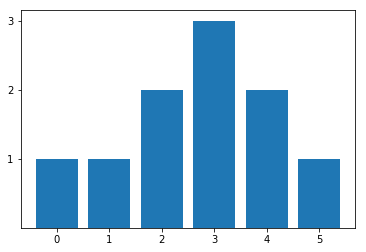

In [2]:
plt.bar(range(0,VALUE_SIZE),outBuffer0)
plt.yticks([0,1,2,3])
yint = range(min(outBuffer0), math.ceil(max(outBuffer0))+1)
plt.yticks(yint)